In [1]:

import rsa as RSA
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt


In [2]:
e,d,c = RSA.keygen(auto_gen=False)
RSA.decrypt(RSA.encrypt("(RSA TIME ANALYSIS): tring different key lengths for RSA",d,c,16),e,c)


'(RSA TIME ANALYSIS): tring different key lengths for RSA'

In [48]:

n_bits = [x for x in range(8,2048)]
time= []

for n in n_bits:
    e,d,c = RSA.keygen(n)
    ts=0
    for i in range(5):
        t = datetime.now()
        RSA.encrypt("(RSA TIME ANALYSIS): tring different key lengths for RSA",d,c,n)
        dt = datetime.now()-t
        ts+=(dt.microseconds)/1000
    time.append(ts/5)




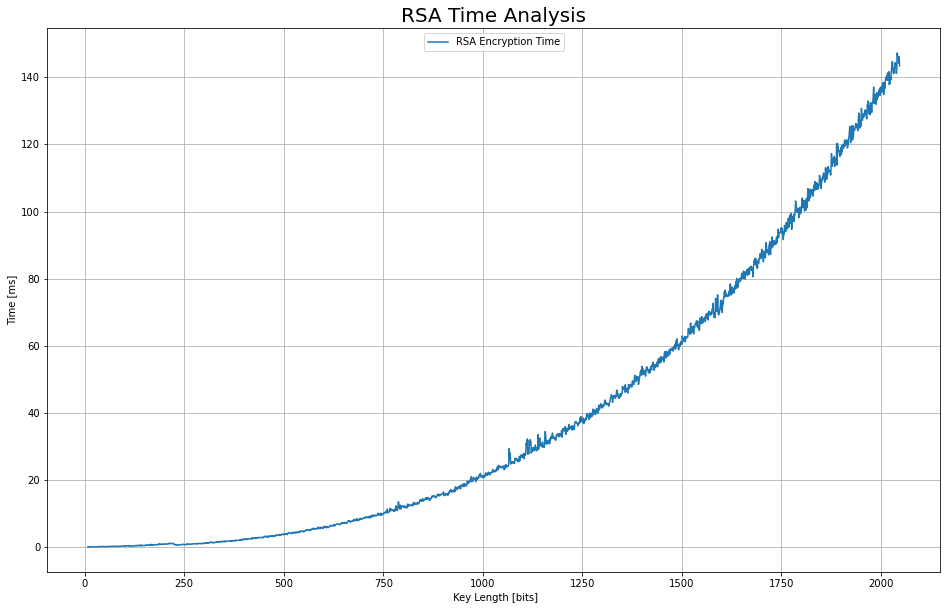

In [49]:
fig = plt.figure(figsize=(16, 10))
plt.plot( n_bits, time,label="RSA Encryption Time")
plt.legend(loc='upper center')

plt.title("RSA Time Analysis", fontsize=20)
plt.xlabel(" Key Length [bits]")
plt.ylabel("Time [ms]")
plt.grid()

In [23]:
import time

n_values=[]
Time_break=[]
i=8
f = open("BruteForce_Break_Key.txt", "a")
fs = open("TimeToBreak.txt", "a")
while (i<= 32):
    e, d, n= RSA.keygen(i)
    f.write(f"d: {d}, e: {e}, n: {n}\n")
    n_values.append(n)
    t =  time.time()
    privte_Key= RSA.Break_key(e,n)
    dt = time.time()-t
    f.write(f"broken privte Key-> {privte_Key} \n\n")
    
    fs.write(str(dt)+"\n")
    Time_break.append(dt)
    print("bits: "+str(i)+ " time : "+str(dt))
    i+=1

    
f.close()
fs.close()

    

bits: 8 time : 1.7881393432617188e-05
bits: 9 time : 3.6716461181640625e-05
bits: 10 time : 6.175041198730469e-05
bits: 11 time : 0.0002231597900390625
bits: 12 time : 0.0002961158752441406
bits: 13 time : 0.0005900859832763672
bits: 14 time : 0.0008714199066162109
bits: 15 time : 0.0017518997192382812
bits: 16 time : 0.007363796234130859
bits: 17 time : 0.013169527053833008
bits: 18 time : 0.0197751522064209
bits: 19 time : 0.062438249588012695
bits: 20 time : 0.08815217018127441
bits: 21 time : 0.21615242958068848
bits: 22 time : 0.3395414352416992
bits: 23 time : 0.7703762054443359
bits: 24 time : 1.300455093383789
bits: 25 time : 3.121720790863037
bits: 26 time : 4.512055158615112
bits: 27 time : 8.757728338241577
bits: 28 time : 18.71769666671753
bits: 29 time : 54.47969698905945
bits: 30 time : 73.03355884552002
bits: 31 time : 233.67036485671997
bits: 32 time : 574.6949751377106


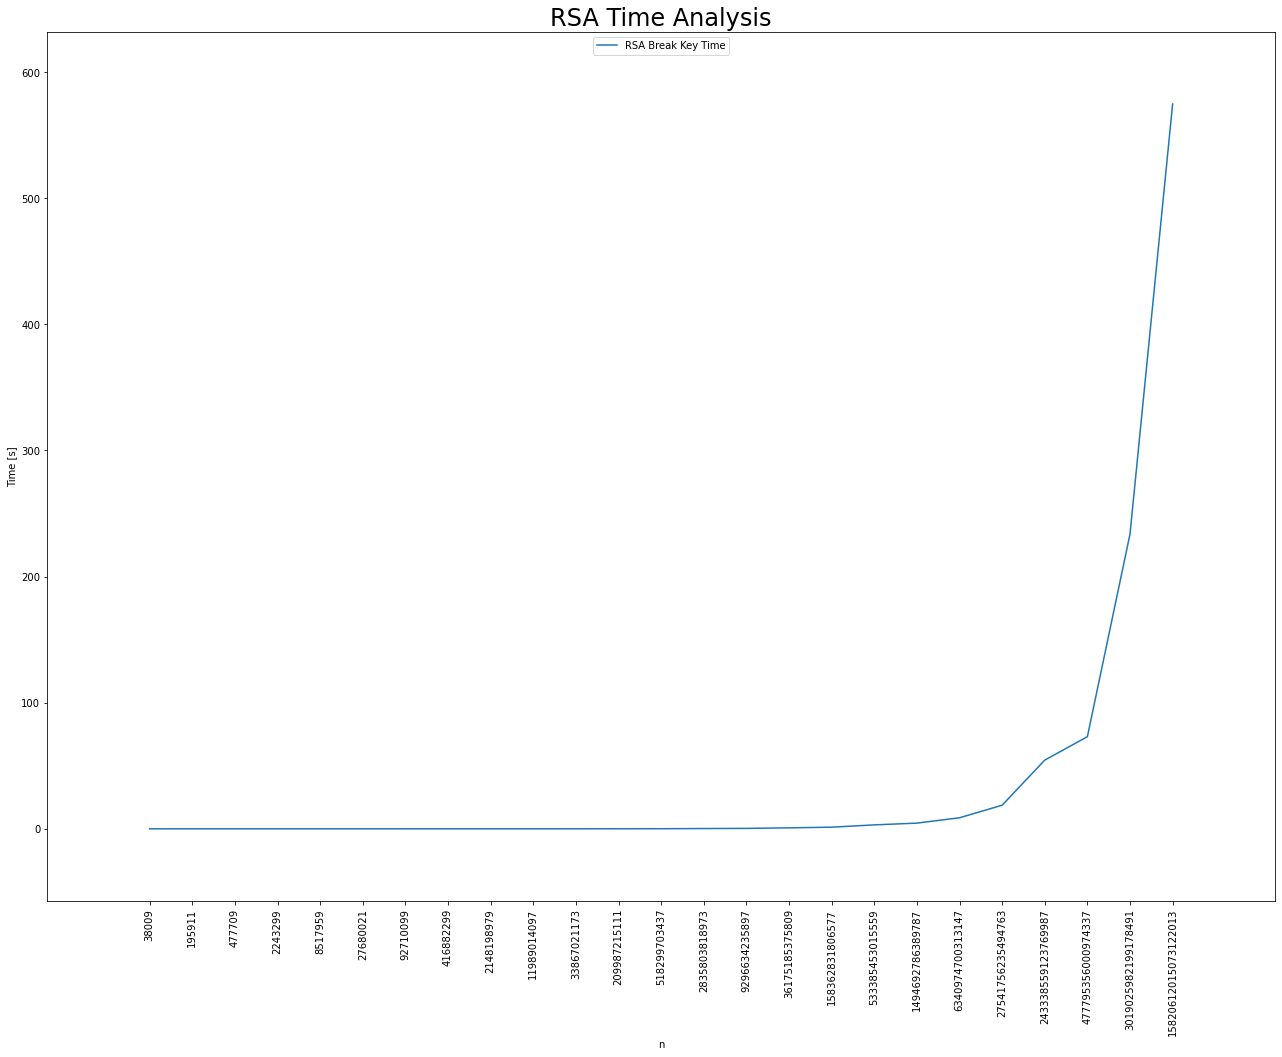

In [37]:
fig = plt.figure(figsize=(22, 16))

default_x_ticks = range(len(n_values))
plt.plot(default_x_ticks, Time_break, label="RSA Break Key Time")
plt.xticks(default_x_ticks, n_values,rotation='vertical')
plt.legend(loc='upper center')
plt.margins(0.1)
plt.title("RSA Time Analysis", fontsize=24)
plt.xlabel("n")
plt.ylabel("Time [s]")

plt.show()

In [ ]:
#### write prime number to prime.txt file 

n_bits = [x for x in range(8,512)]
f = open("prime.txt", "a")

for n in n_bits:
    f.write(f"\n\n\n  {n} bits \n------------")
    for j in range(4):
        f.write(f" \n {j+1}. "+str(RSA.gen_prime(n))+"\n")



f.close()